<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly==5.11.0
!pip install -U kaleido
!pip install imbalanced-learn

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm.notebook import tqdm
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not ins

#connecting with drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#read in csv file

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Sleep_Research/draft/HMC_Sleep_Stages.csv")

In [4]:
df.head()

,Subject,Sleep_Stage,Epoch,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,SpectralEdge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,SpectralEdge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,SpectralEdge_Gamma_O2,PeakF_Gamma_O2
0,SN002,N1,6,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,SN002,N1,7,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,SN002,N1,8,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,SN002,N1,116,0.00054,9.74049,15.98439,15.48488,8.36683,0.00051,14.61073,...,0.00082,0.87415,7.49268,3.49659,0.87415,0.000039,28.34732,43.08293,49.95122,49.95122
4,SN002,N1,117,0.00034,10.11512,16.48390,15.98439,12.23805,0.00034,15.11024,...,0.00084,0.87415,6.86829,2.87220,0.62439,0.000032,28.97171,43.20780,49.95122,49.95122


In [5]:
df.isnull().sum()

Subject                  0
Sleep_Stage              0
Epoch                    0
MeanP_Alpha_F4           0
MedianF_Alpha_F4         0
                        ..
MeanP_Gamma_O2           0
MedianF_Gamma_O2         0
MeanF_Gamma_O2           0
SpectralEdge_Gamma_O2    0
PeakF_Gamma_O2           0
Length: 78, dtype: int64

In [6]:
df = df.dropna().reset_index(drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108451 entries, 0 to 108450
Data columns (total 78 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Subject                108451 non-null  object 
 1   Sleep_Stage            108451 non-null  object 
 2   Epoch                  108451 non-null  int64  
 3   MeanP_Alpha_F4         108451 non-null  float64
 4   MedianF_Alpha_F4       108451 non-null  float64
 5   MeanF_Alpha_F4         108451 non-null  float64
 6   SpectralEdge_Alpha_F4  108451 non-null  float64
 7   PeakF_Alpha_F4         108451 non-null  float64
 8   MeanP_Beta_F4          108451 non-null  float64
 9   MedianF_Beta_F4        108451 non-null  float64
 10  MeanF_Beta_F4          108451 non-null  float64
 11  SpectralEdge_Beta_F4   108451 non-null  float64
 12  PeakF_Beta_F4          108451 non-null  float64
 13  MeanP_Theta_F4         108451 non-null  float64
 14  MedianF_Theta_F4       108451 non-nu

In [8]:
df.shape

(108451, 78)

#Converting N1,N2 -> Light_Sleep, N3 -> Deep_Sleep And removing W stage and R Stage.

In [9]:
df =df.replace("N1", "Light_Sleep")
df =df.replace("N2", "Light_Sleep")
df =df.replace("N3", "Deep_Sleep")
df.drop(df.index[df['Sleep_Stage'] == "R"], inplace = True)
df.drop(df.index[df['Sleep_Stage'] == "W"], inplace = True)

In [10]:
df.head()

,Subject,Sleep_Stage,Epoch,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,SpectralEdge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,SpectralEdge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,SpectralEdge_Gamma_O2,PeakF_Gamma_O2
0,SN002,Light_Sleep,6,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,SN002,Light_Sleep,7,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,SN002,Light_Sleep,8,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,SN002,Light_Sleep,116,0.00054,9.74049,15.98439,15.48488,8.36683,0.00051,14.61073,...,0.00082,0.87415,7.49268,3.49659,0.87415,0.000039,28.34732,43.08293,49.95122,49.95122
4,SN002,Light_Sleep,117,0.00034,10.11512,16.48390,15.98439,12.23805,0.00034,15.11024,...,0.00084,0.87415,6.86829,2.87220,0.62439,0.000032,28.97171,43.20780,49.95122,49.95122


In [11]:
df.shape

(72631, 78)

#Removing columns

In [12]:
df = df.loc[:,df.columns != "Subject"]
df = df.loc[:,df.columns != "Epoch"]

#All Columns Histogram

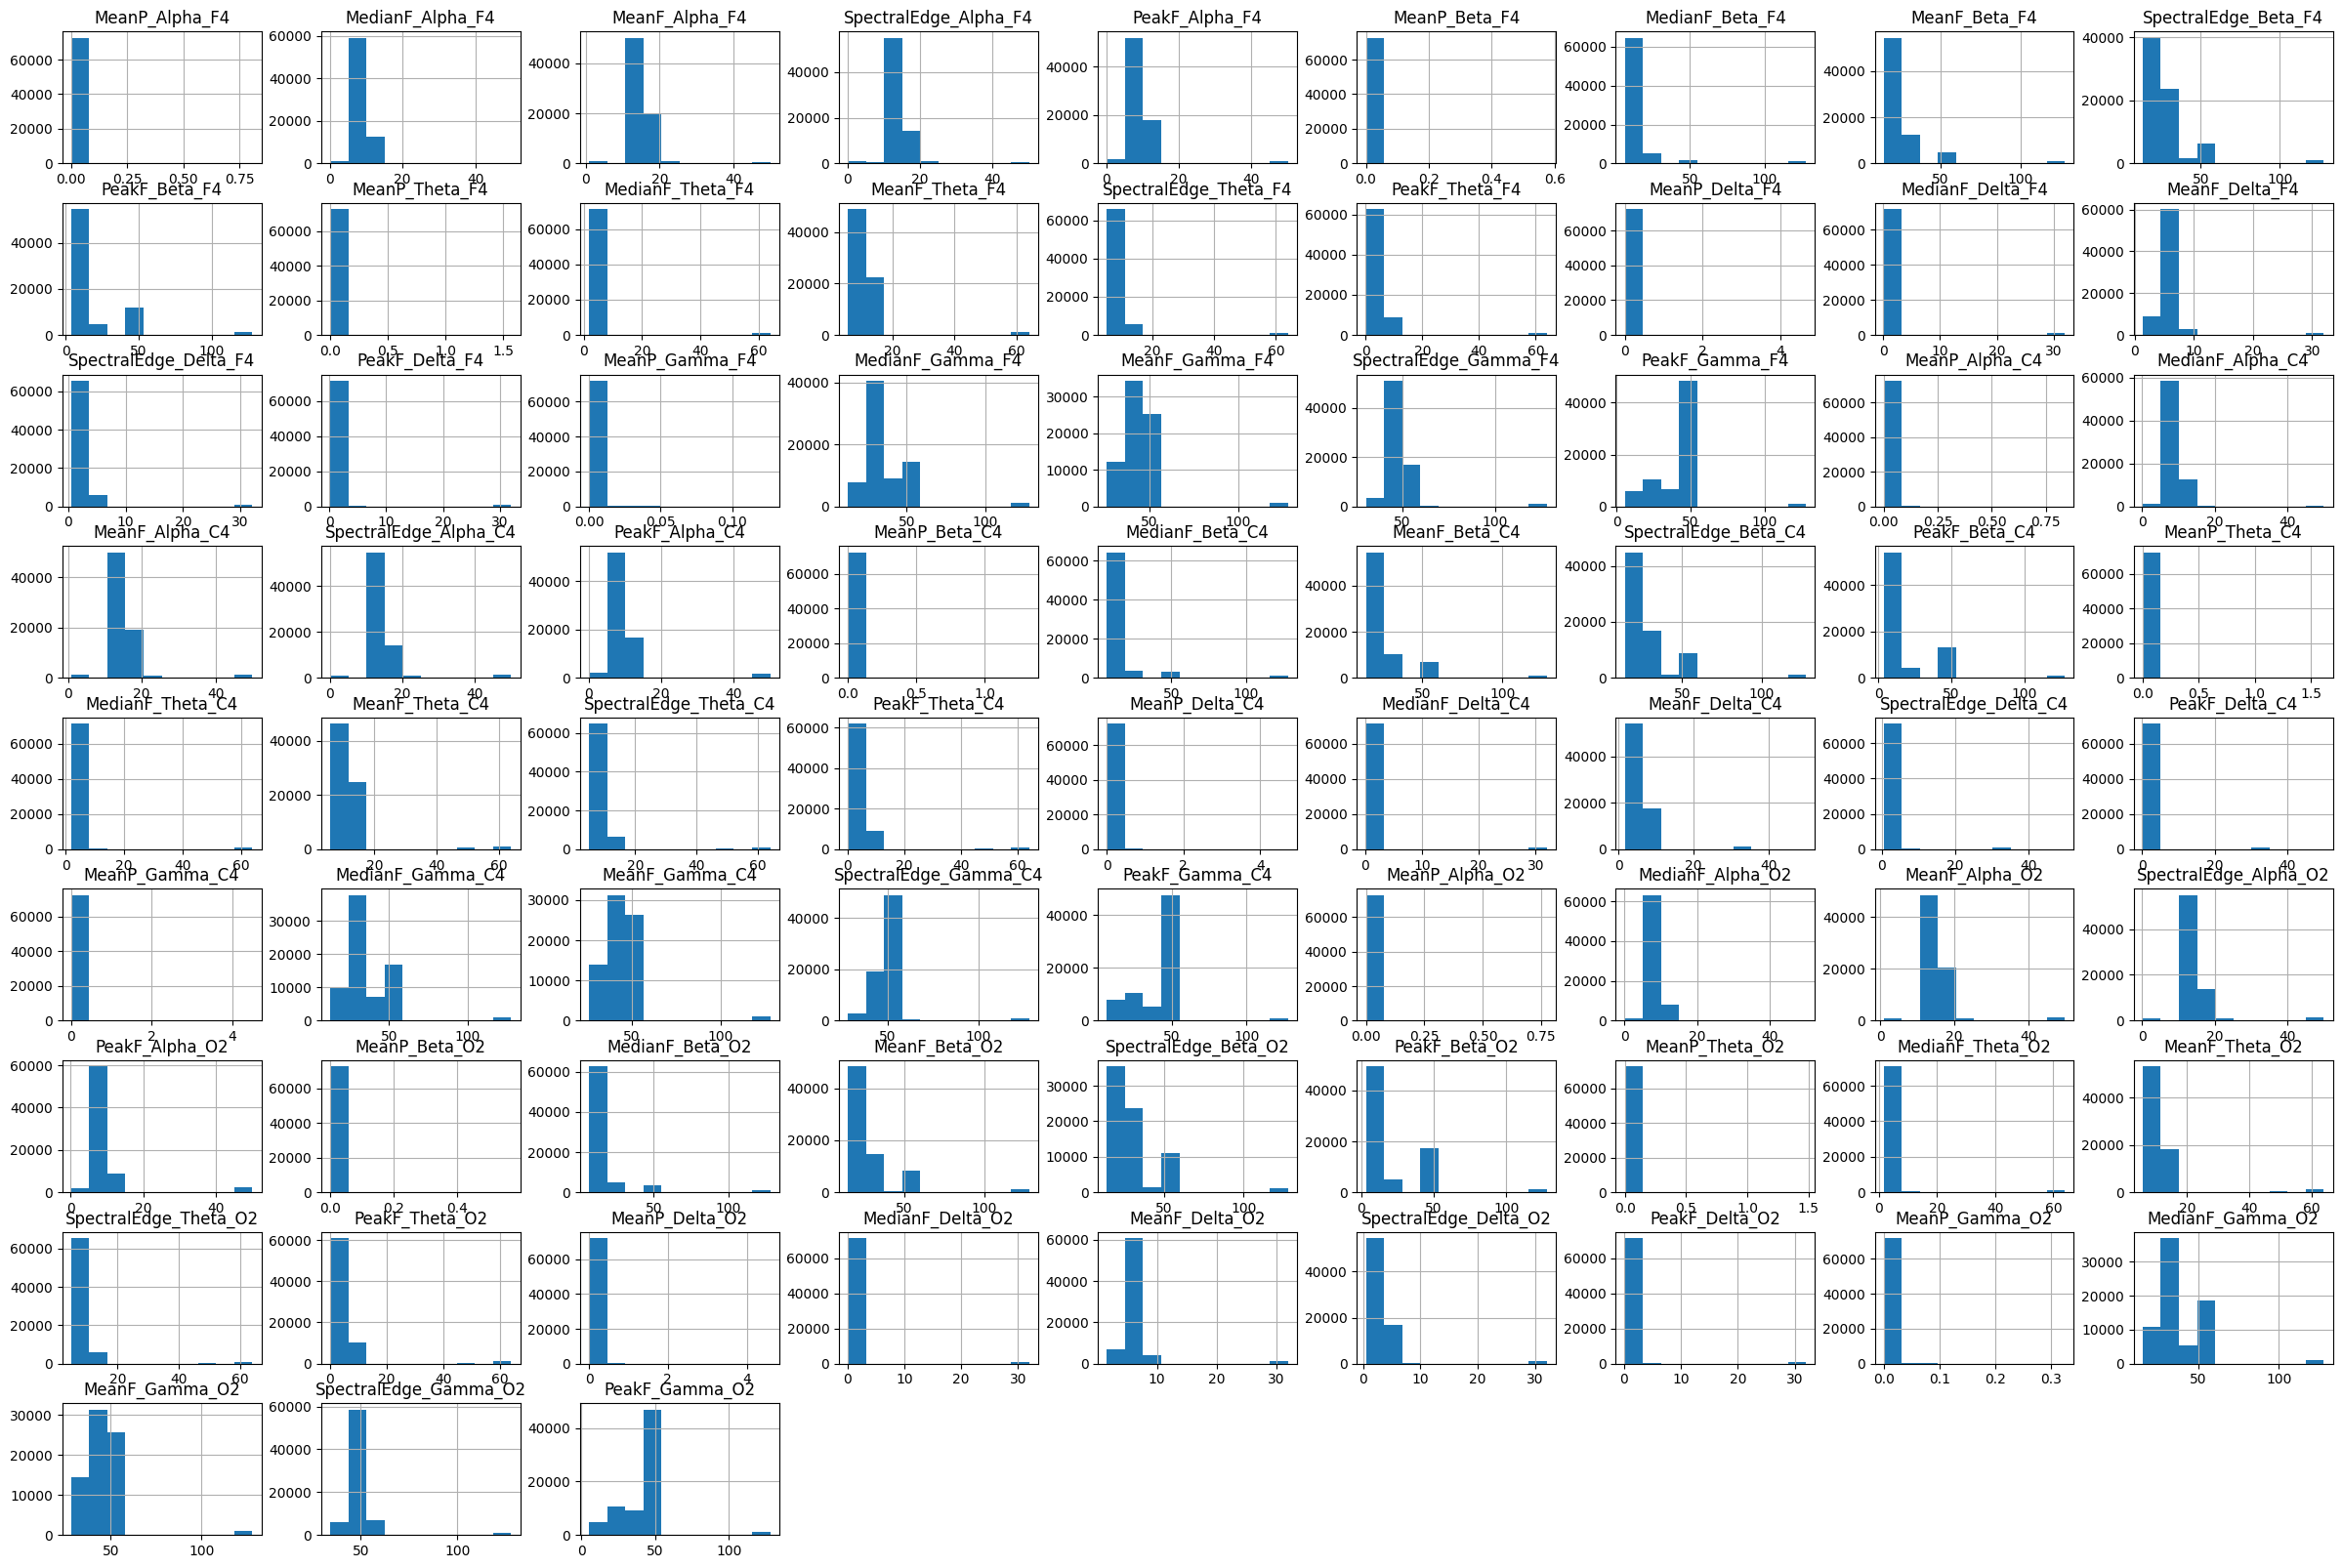

In [ ]:
from matplotlib import pyplot
from pandas import read_csv

df.hist(figsize=(30,20))
pyplot.show()

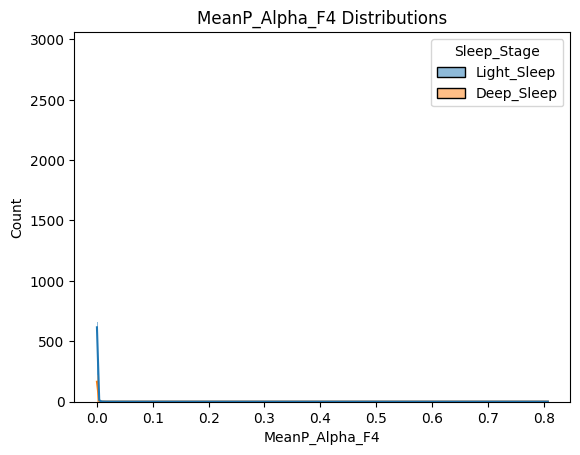

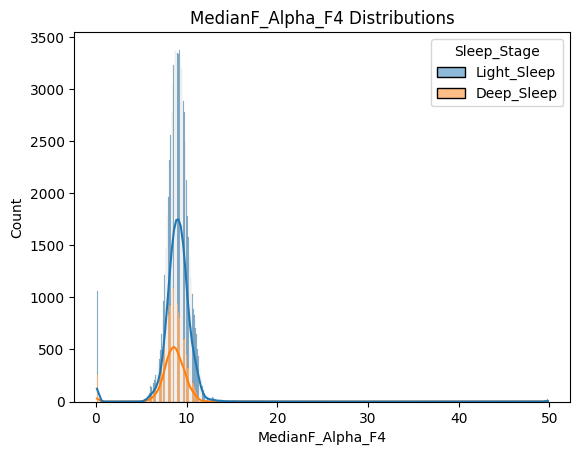

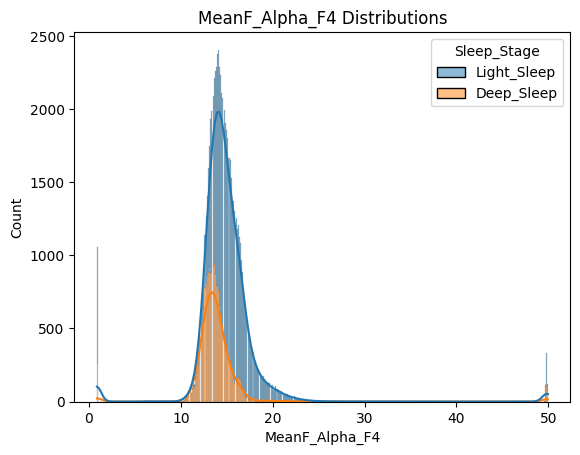

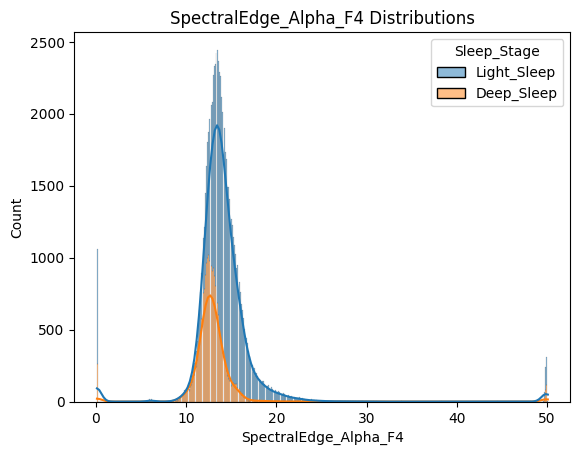

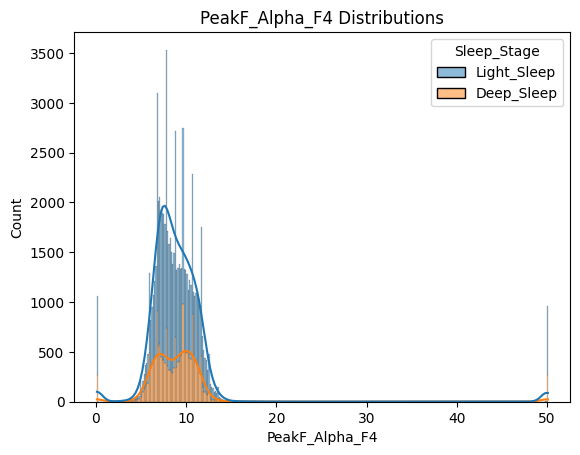

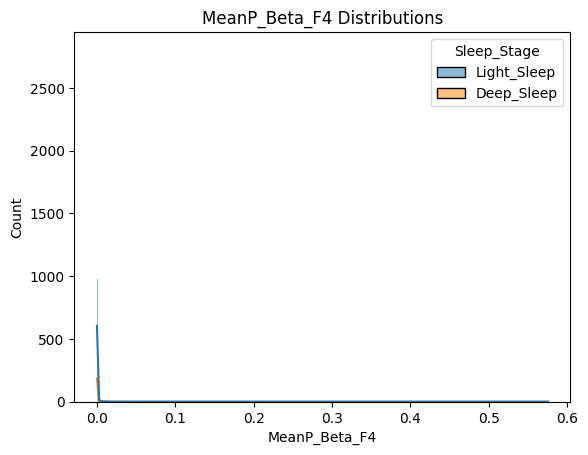

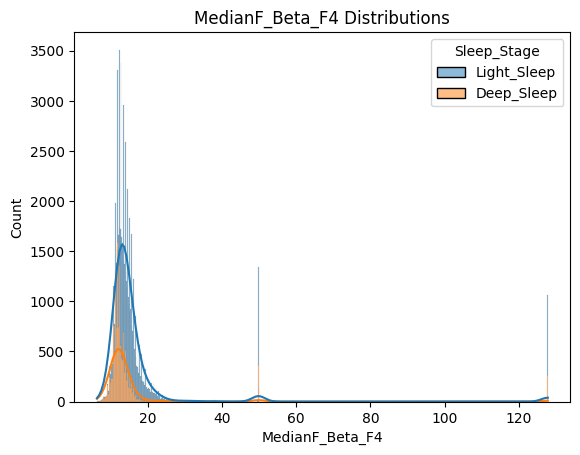

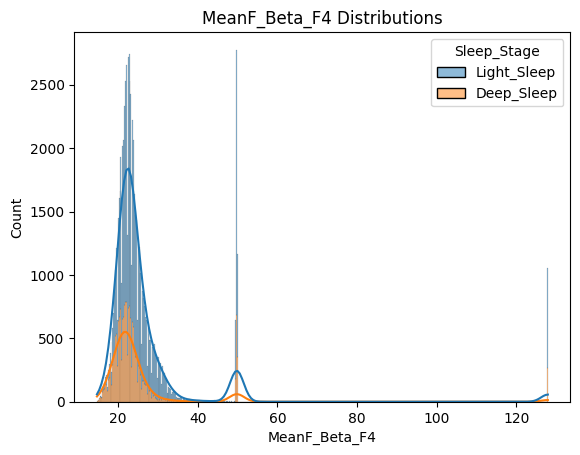

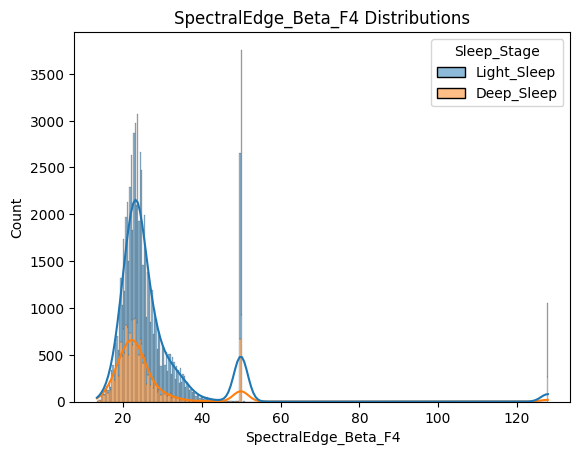

In [ ]:

numeric_col = list(df.loc[:,df.columns!="Sleep_Stage"].columns)

for i in numeric_col[0:9]:
  plt.figure()
  sns.histplot(data=df,x=i, hue="Sleep_Stage",kde = True, multiple="stack")
  plt.title(i+" Distributions")
  plt.show()


#Encoding target columns (Sleep Stage)

In [13]:
target="Sleep_Stage"

In [14]:
from sklearn.preprocessing import LabelEncoder
encd = LabelEncoder()

In [15]:
df[target] = encd.fit_transform(df[target])

In [16]:
df[target].value_counts()

1    51341
0    21290
Name: Sleep_Stage, dtype: int64

<Axes: xlabel='Sleep_Stage', ylabel='count'>

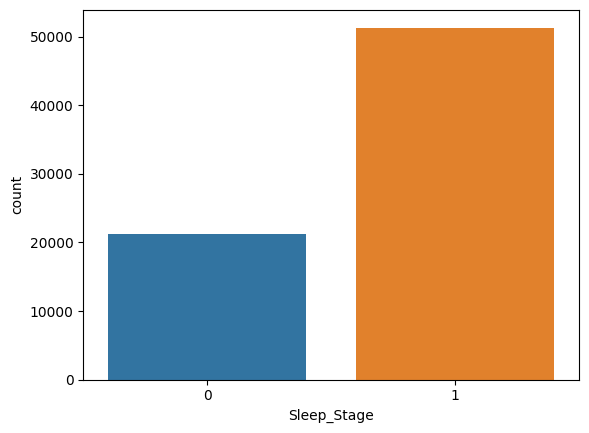

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Sleep_Stage",data=df)

#Feature Selections Methods

In [18]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#ANOVA
def anova(X,y,num_of_feat):
  fs = SelectKBest(score_func=f_classif, k=5)
  fit = fs.fit(X,y)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)

  featureScores = pd.concat([dfcolumns,dfscores],axis=1)

  featureScores.columns = ['Best_columns','Score_ANOVA']

  lyst = featureScores.nlargest(num_of_feat,'Score_ANOVA')
  ANOVA_feature=list(lyst['Best_columns'])
  return ANOVA_feature



#PEARSON
def pearson(X,y,num_of_feat):
  fs = SelectKBest(score_func=f_regression, k=5)
  fit = fs.fit(X,y)

  #create df for scores
  dfscores = pd.DataFrame(fit.scores_)
  #create df for column names
  dfcolumns = pd.DataFrame(df.columns)
  #concat two dataframes for better visualization
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  #naming the dataframe columns
  featureScores.columns = ['Best_columns','Score_pearsons']

  #print 10 best features
  lyst = featureScores.nlargest(num_of_feat,'Score_pearsons')

  PEARSON_feature=list(lyst['Best_columns'])
  return PEARSON_feature




#Univarient
def uni(X,y,num_of_feat):
  bestfeatures = SelectKBest(score_func=chi2, k=10)
  fit = bestfeatures.fit(X,y)

  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)


  #concat two dataframes for better visualization
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']  #naming the dataframe columns



  sorted_df = featureScores.sort_values(by=['Score'], ascending=False)
  Univarient_feature = sorted_df["Specs"][:num_of_feat]
  return Univarient_feature

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

col_number = [10,15,20,25,30,35,40,45,50,55,60,65,70]
anova_accu = []
pear_accu = []
uni_accu = []


for i in tqdm(col_number):

  anova_col_name = anova(df.loc[:,df.columns != target],df[target],i)
  pear_col_name = pearson(df.loc[:,df.columns != target],df[target],i)
  uni_col_name = uni(df.loc[:,df.columns != target],df[target],i)

  anova_X = df.loc[:,anova_col_name]
  pear_X = df.loc[:,pear_col_name]
  uni_X = df.loc[:,uni_col_name]
  y = df[target]
  list_X = [("anova",anova_X),("pearson",pear_X),("univarient",uni_X)]

  for method,X in list_X:

    scaler = StandardScaler()
    scaler.fit(X)
    X[X.columns] = scaler.transform(X)

    X_train, X_test_val, y_train, y_test_val= train_test_split(X,y, test_size=0.3,random_state=42)
    X_test, X_val, y_test, y_val= train_test_split(X_test_val, y_test_val, train_size=.5, random_state=42)

    smote = SMOTE()
    X_train,y_train = smote.fit_resample(X_train,y_train)

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred_test = rf.predict(X_test)

    ts_accu = accuracy_score(y_test, y_pred_test)

    print("-----------------------------------------------------------------------")
    print("Feature Selectiokn Method: ",method)
    print("Number of Features: ",i)
    print("Accurecy: ",ts_accu)
    print("-----------------------------------------------------------------------")

    if method=="anova":
      anova_accu.append(ts_accu)
    elif method=="pearson":
      pear_accu.append(ts_accu)
    elif method=="univarient":
      uni_accu.append(ts_accu)
  print("__________________________________________________________________________________________________________________________________________________________")

  0%|          | 0/13 [00:00<?, ?it/s]

-----------------------------------------------------------------------
Feature Selectiokn Method:  anova
Number of Features:  10
Accurecy:  0.865167508031207
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Feature Selectiokn Method:  pearson
Number of Features:  10
Accurecy:  0.8425883432767325
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Feature Selectiokn Method:  univarient
Number of Features:  10
Accurecy:  0.8544286369894447
-----------------------------------------------------------------------
__________________________________________________________________________________________________________________________________________________________
-----------------------------------------------------------------------
Feature Selectiokn Method:  anova
Number of Features:  15
Accurecy:  0.

#

###Making a Feature Selection Records dataset and save it.
It takes long time to complete the feature selectiion approch. So we make a dataset so that we do not have to run the feature selection cell every time.

In [ ]:
df_feat = pd.DataFrame(columns =['Method', 'Number_of_feature','Accurecy'])


df_feat['Method'] = ["Anova","Anova","Anova","Anova","Anova","Anova","Anova","Anova","Anova","Anova","Anova","Anova","Anova",
                     "Pearson","Pearson","Pearson","Pearson","Pearson","Pearson","Pearson","Pearson","Pearson","Pearson","Pearson","Pearson","Pearson",
                     "Univarient","Univarient","Univarient","Univarient","Univarient","Univarient","Univarient","Univarient","Univarient","Univarient","Univarient","Univarient","Univarient",]
df_feat['Number_of_feature'] = col_number+col_number+col_number
df_feat['Accurecy'] = anova_accu+pear_accu+uni_accu

df_feat.to_csv("Feature_Selection_Records.csv",index=False)




In [ ]:
df_feat

,Method,Number_of_feature,Accurecy
0,Anova,10,0.865168
1,Anova,15,0.880128
2,Anova,20,0.883066
3,Anova,25,0.884810
4,Anova,30,0.885177
5,Anova,35,0.889674
6,Anova,40,0.894906
7,Anova,45,0.898669
8,Anova,50,0.901514
9,Anova,55,0.903809


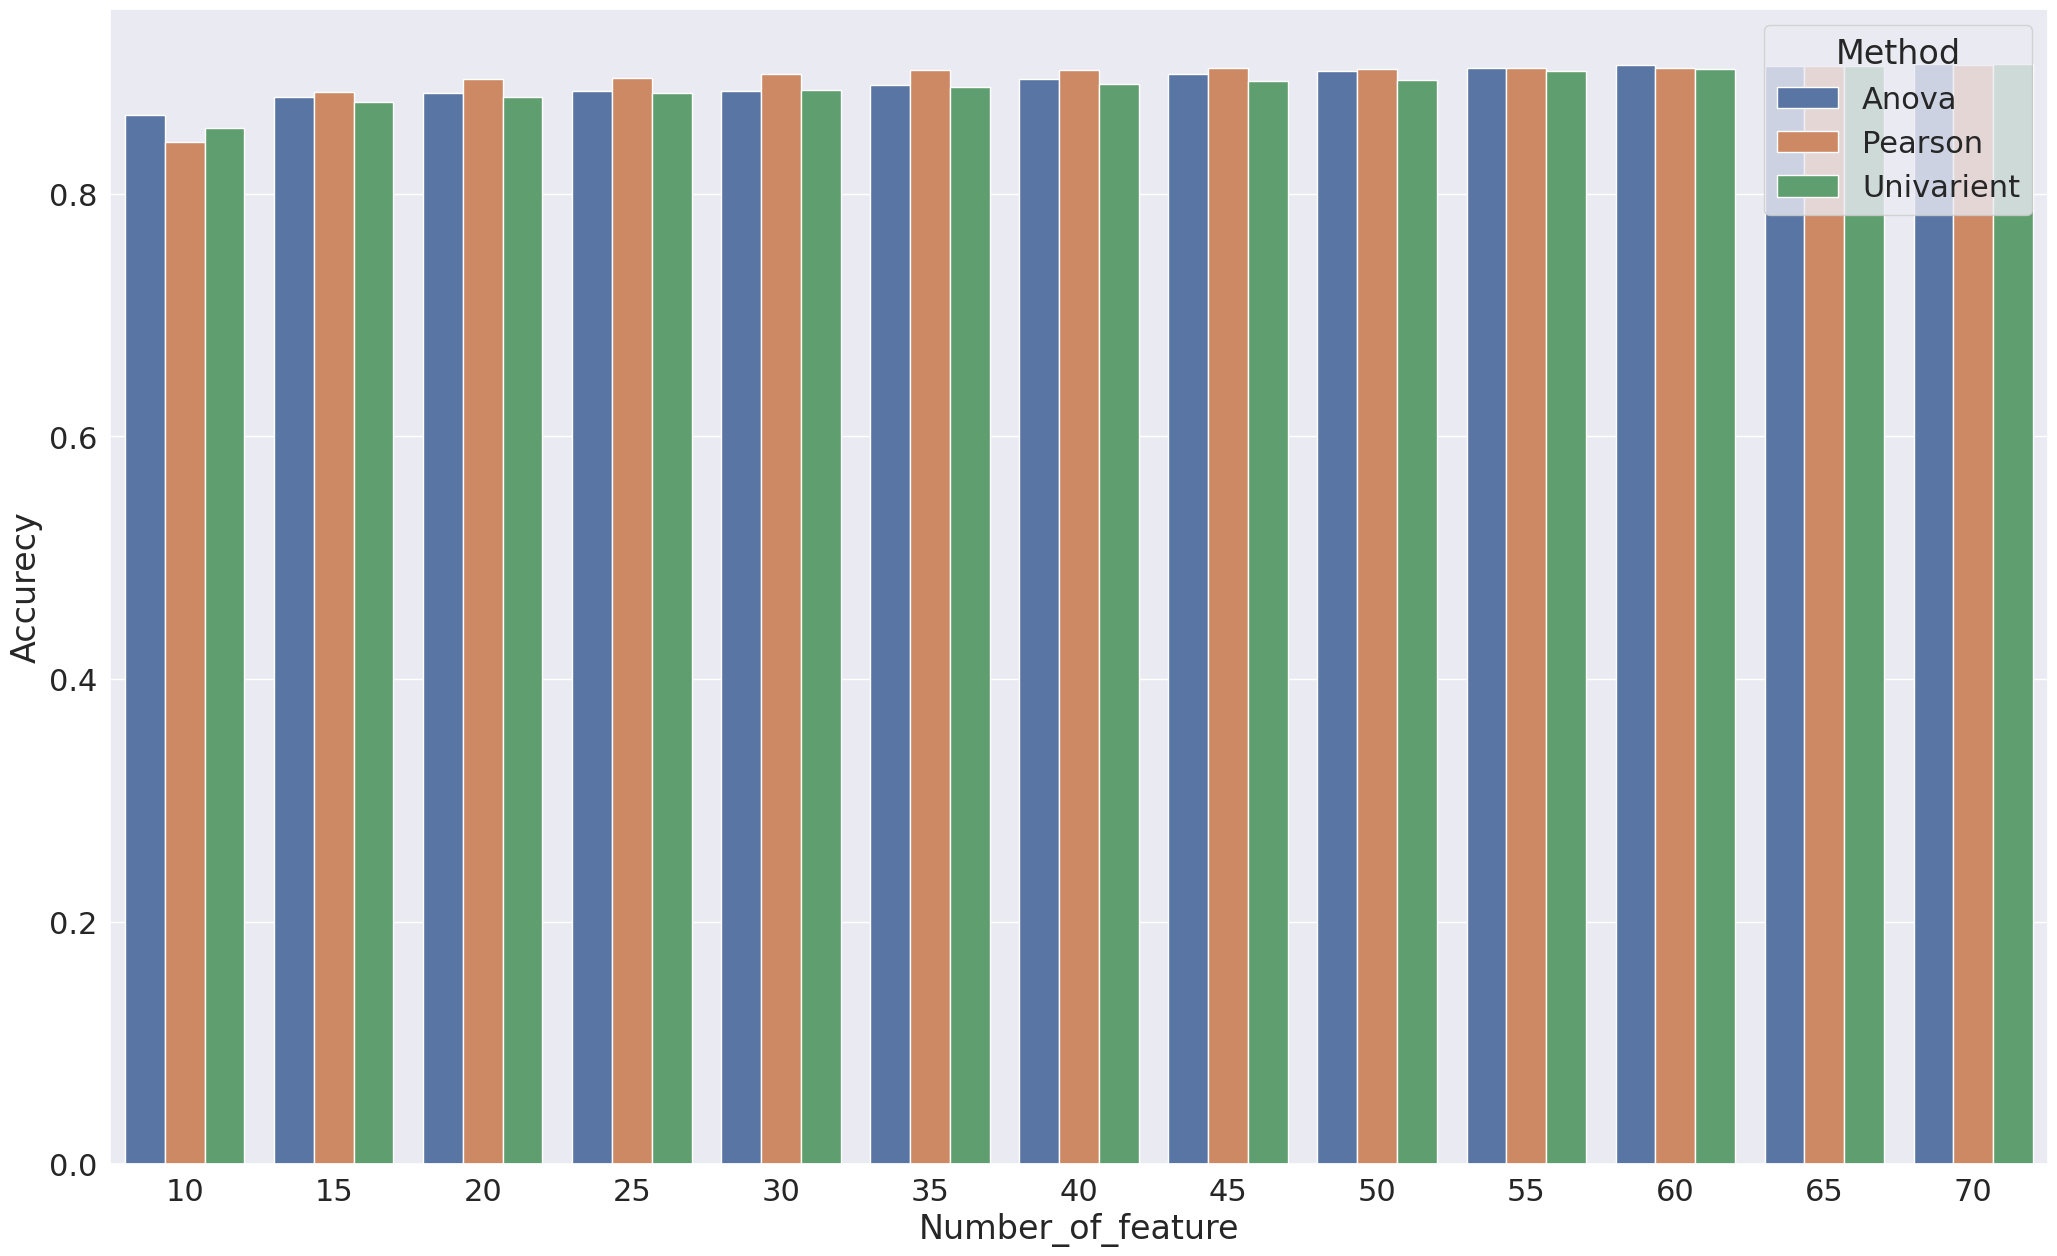

In [ ]:

fig, ax = plt.subplots(figsize=(25, 15))
sns.set_style("darkgrid")
sns.set(font_scale = 2)
cx = sns.barplot(df_feat, x="Number_of_feature", y="Accurecy", hue="Method",errwidth=0,ax=ax)

In [ ]:
df_feat.sort_values('Accurecy', ascending=False)

,Method,Number_of_feature,Accurecy
38,Univarient,70,0.906838
12,Anova,70,0.906838
25,Pearson,70,0.906379
10,Anova,60,0.906287
37,Univarient,65,0.905645
24,Pearson,65,0.905094
11,Anova,65,0.905094
22,Pearson,55,0.903993
9,Anova,55,0.903809
23,Pearson,60,0.903534


The max accurecy obtained is  90%. 35 columns selected with Pearson feature selection method is the optimum result.

In [20]:
X=df.loc[:,df.columns!=target]
y=df[target]


fs = SelectKBest(score_func=f_regression, k=5)
fit = fs.fit(X,y)

#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(df.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Best_columns','Score_pearsons']

#print 10 best features
lyst = featureScores.nlargest(35,'Score_pearsons')

PEARSON_feature=list(lyst['Best_columns'])

In [21]:
lyst

,Best_columns,Score_pearsons
3,MeanF_Alpha_F4,2081.855536
2,MedianF_Alpha_F4,1959.214962
51,MeanP_Alpha_O2,1435.565283
42,MedianF_Delta_C4,1417.481898
17,MedianF_Delta_F4,1239.603556
1,MeanP_Alpha_F4,1174.735459
67,MedianF_Delta_O2,1123.514069
28,MeanF_Alpha_C4,1003.270236
27,MedianF_Alpha_C4,953.657159
8,MeanF_Beta_F4,689.531196


###Best Features with Pearson Feature Selection Score

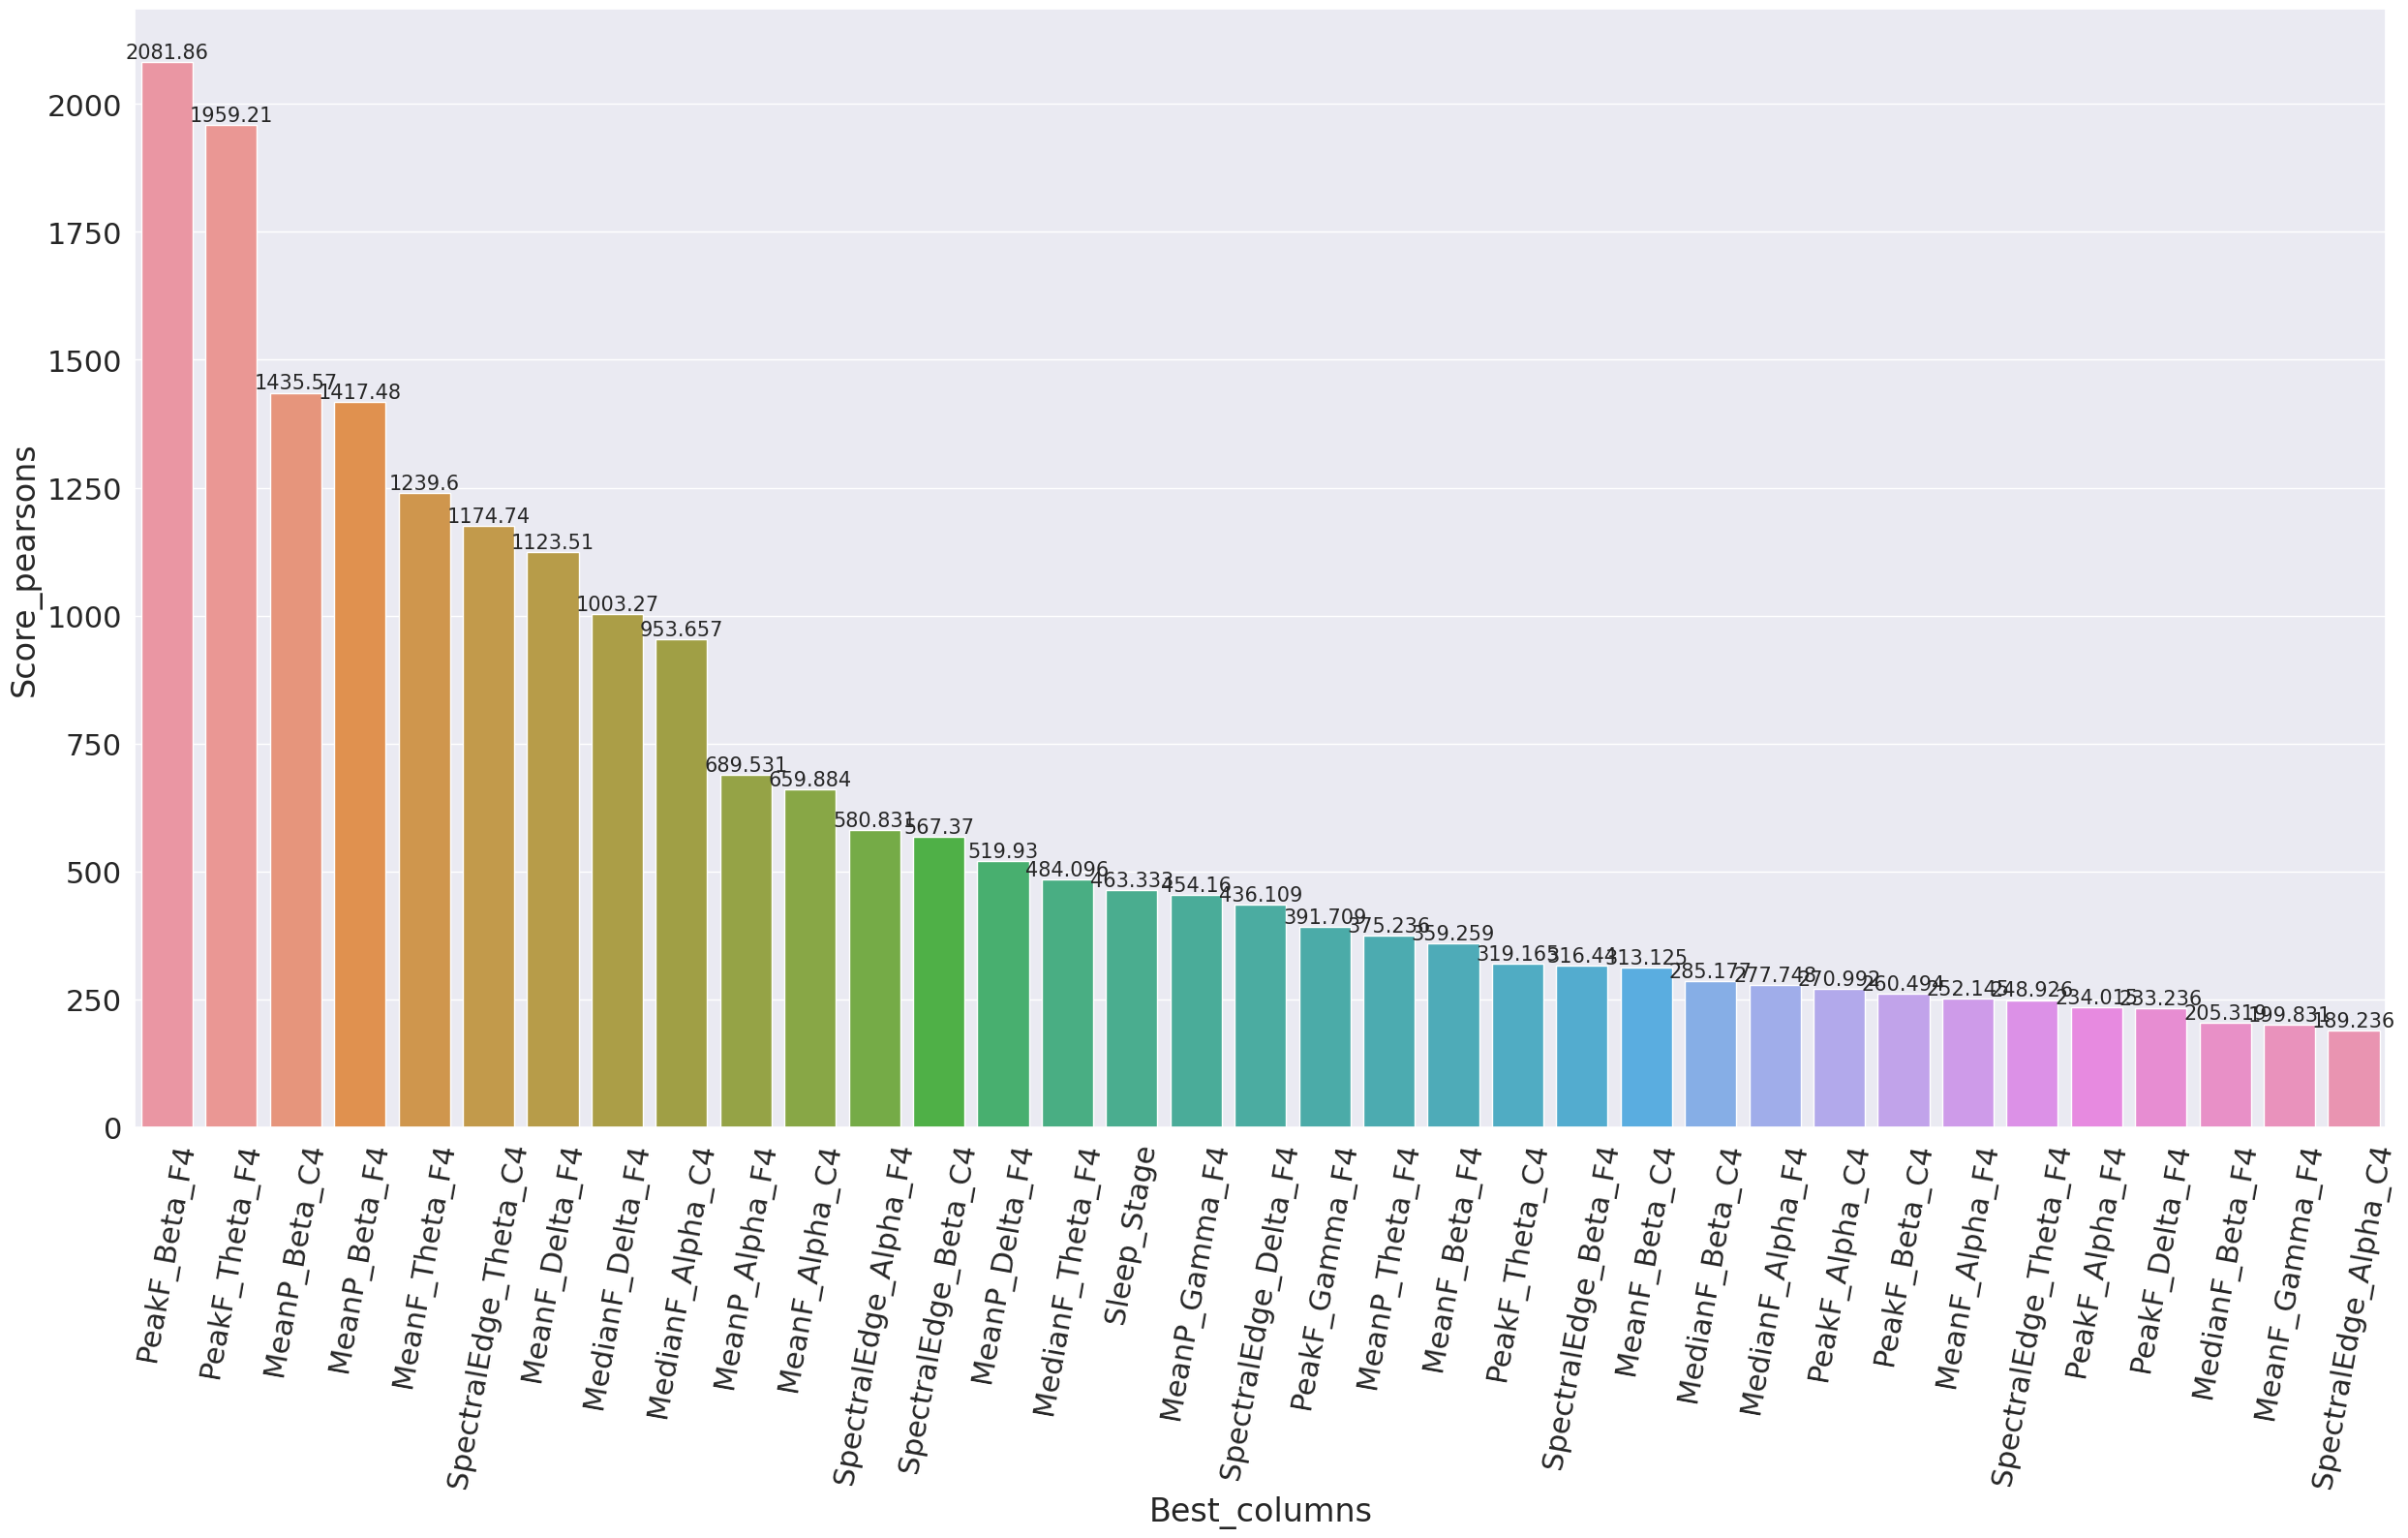

In [ ]:

fig, ax = plt.subplots(figsize=(30, 15))
ax.tick_params(axis='x', rotation=80)
cx = sns.barplot(lyst, x="Best_columns", y="Score_pearsons", estimator="sum", errorbar=None,ax=ax)
cx.bar_label(ax.containers[0], fontsize=15);

#Defining New Dataset with Selected Features

In [22]:
df = df.loc[:,["Sleep_Stage"]+PEARSON_feature]

In [23]:
df

,Sleep_Stage,MeanF_Alpha_F4,MedianF_Alpha_F4,MeanP_Alpha_O2,MedianF_Delta_C4,MedianF_Delta_F4,MeanP_Alpha_F4,MedianF_Delta_O2,MeanF_Alpha_C4,MedianF_Alpha_C4,...,SpectralEdge_Beta_C4,MeanF_Theta_C4,MedianF_Theta_C4,SpectralEdge_Beta_F4,MeanP_Theta_C4,MeanP_Beta_C4,MeanF_Beta_O2,MeanP_Beta_O2,MeanP_Theta_F4,MeanP_Theta_O2
0,1,17.85756,10.11512,0.00023,0.87415,0.74927,0.00034,0.74927,18.48195,9.86537,...,27.22341,12.11317,5.86927,27.47317,0.00048,0.00054,25.84976,0.00034,0.00041,0.00025
1,1,17.60780,10.73951,0.00023,0.87415,0.74927,0.00035,0.99902,19.60585,10.48976,...,27.09854,12.98732,5.61951,26.97366,0.00051,0.00064,26.22439,0.00032,0.00040,0.00027
2,1,17.60780,9.36585,0.00025,1.62341,0.99902,0.00035,1.49854,17.35805,8.99122,...,27.97268,10.61463,5.12000,28.47220,0.00078,0.00047,26.47415,0.00031,0.00052,0.00036
3,1,15.98439,9.74049,0.00029,0.87415,0.74927,0.00054,0.87415,17.10829,10.24000,...,23.10244,12.98732,6.49366,22.47805,0.00059,0.00064,22.72780,0.00030,0.00058,0.00033
4,1,16.48390,10.11512,0.00020,0.74927,0.62439,0.00034,0.87415,17.10829,9.86537,...,23.85171,12.36293,6.24390,23.47707,0.00042,0.00040,22.97756,0.00023,0.00044,0.00021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72626,0,15.23512,9.49073,0.00027,0.99902,0.99902,0.00027,0.99902,14.73561,9.61561,...,22.60293,11.11415,4.24585,23.72683,0.00059,0.00022,22.60293,0.00021,0.00061,0.00061
72627,0,15.60976,9.61561,0.00024,0.99902,0.74927,0.00024,0.74927,15.23512,8.61659,...,22.85268,10.48976,3.87122,23.85171,0.00068,0.00019,22.85268,0.00020,0.00056,0.00056
72628,0,15.36000,10.24000,0.00026,0.87415,0.74927,0.00026,0.74927,15.23512,10.24000,...,22.97756,11.48878,4.62049,23.60195,0.00046,0.00021,22.72780,0.00022,0.00051,0.00051
72629,0,15.36000,8.61659,0.00026,0.99902,0.87415,0.00026,0.87415,15.36000,8.36683,...,23.85171,10.86439,4.12098,24.10146,0.00058,0.00018,22.97756,0.00020,0.00056,0.00056


#Corelation Matrix

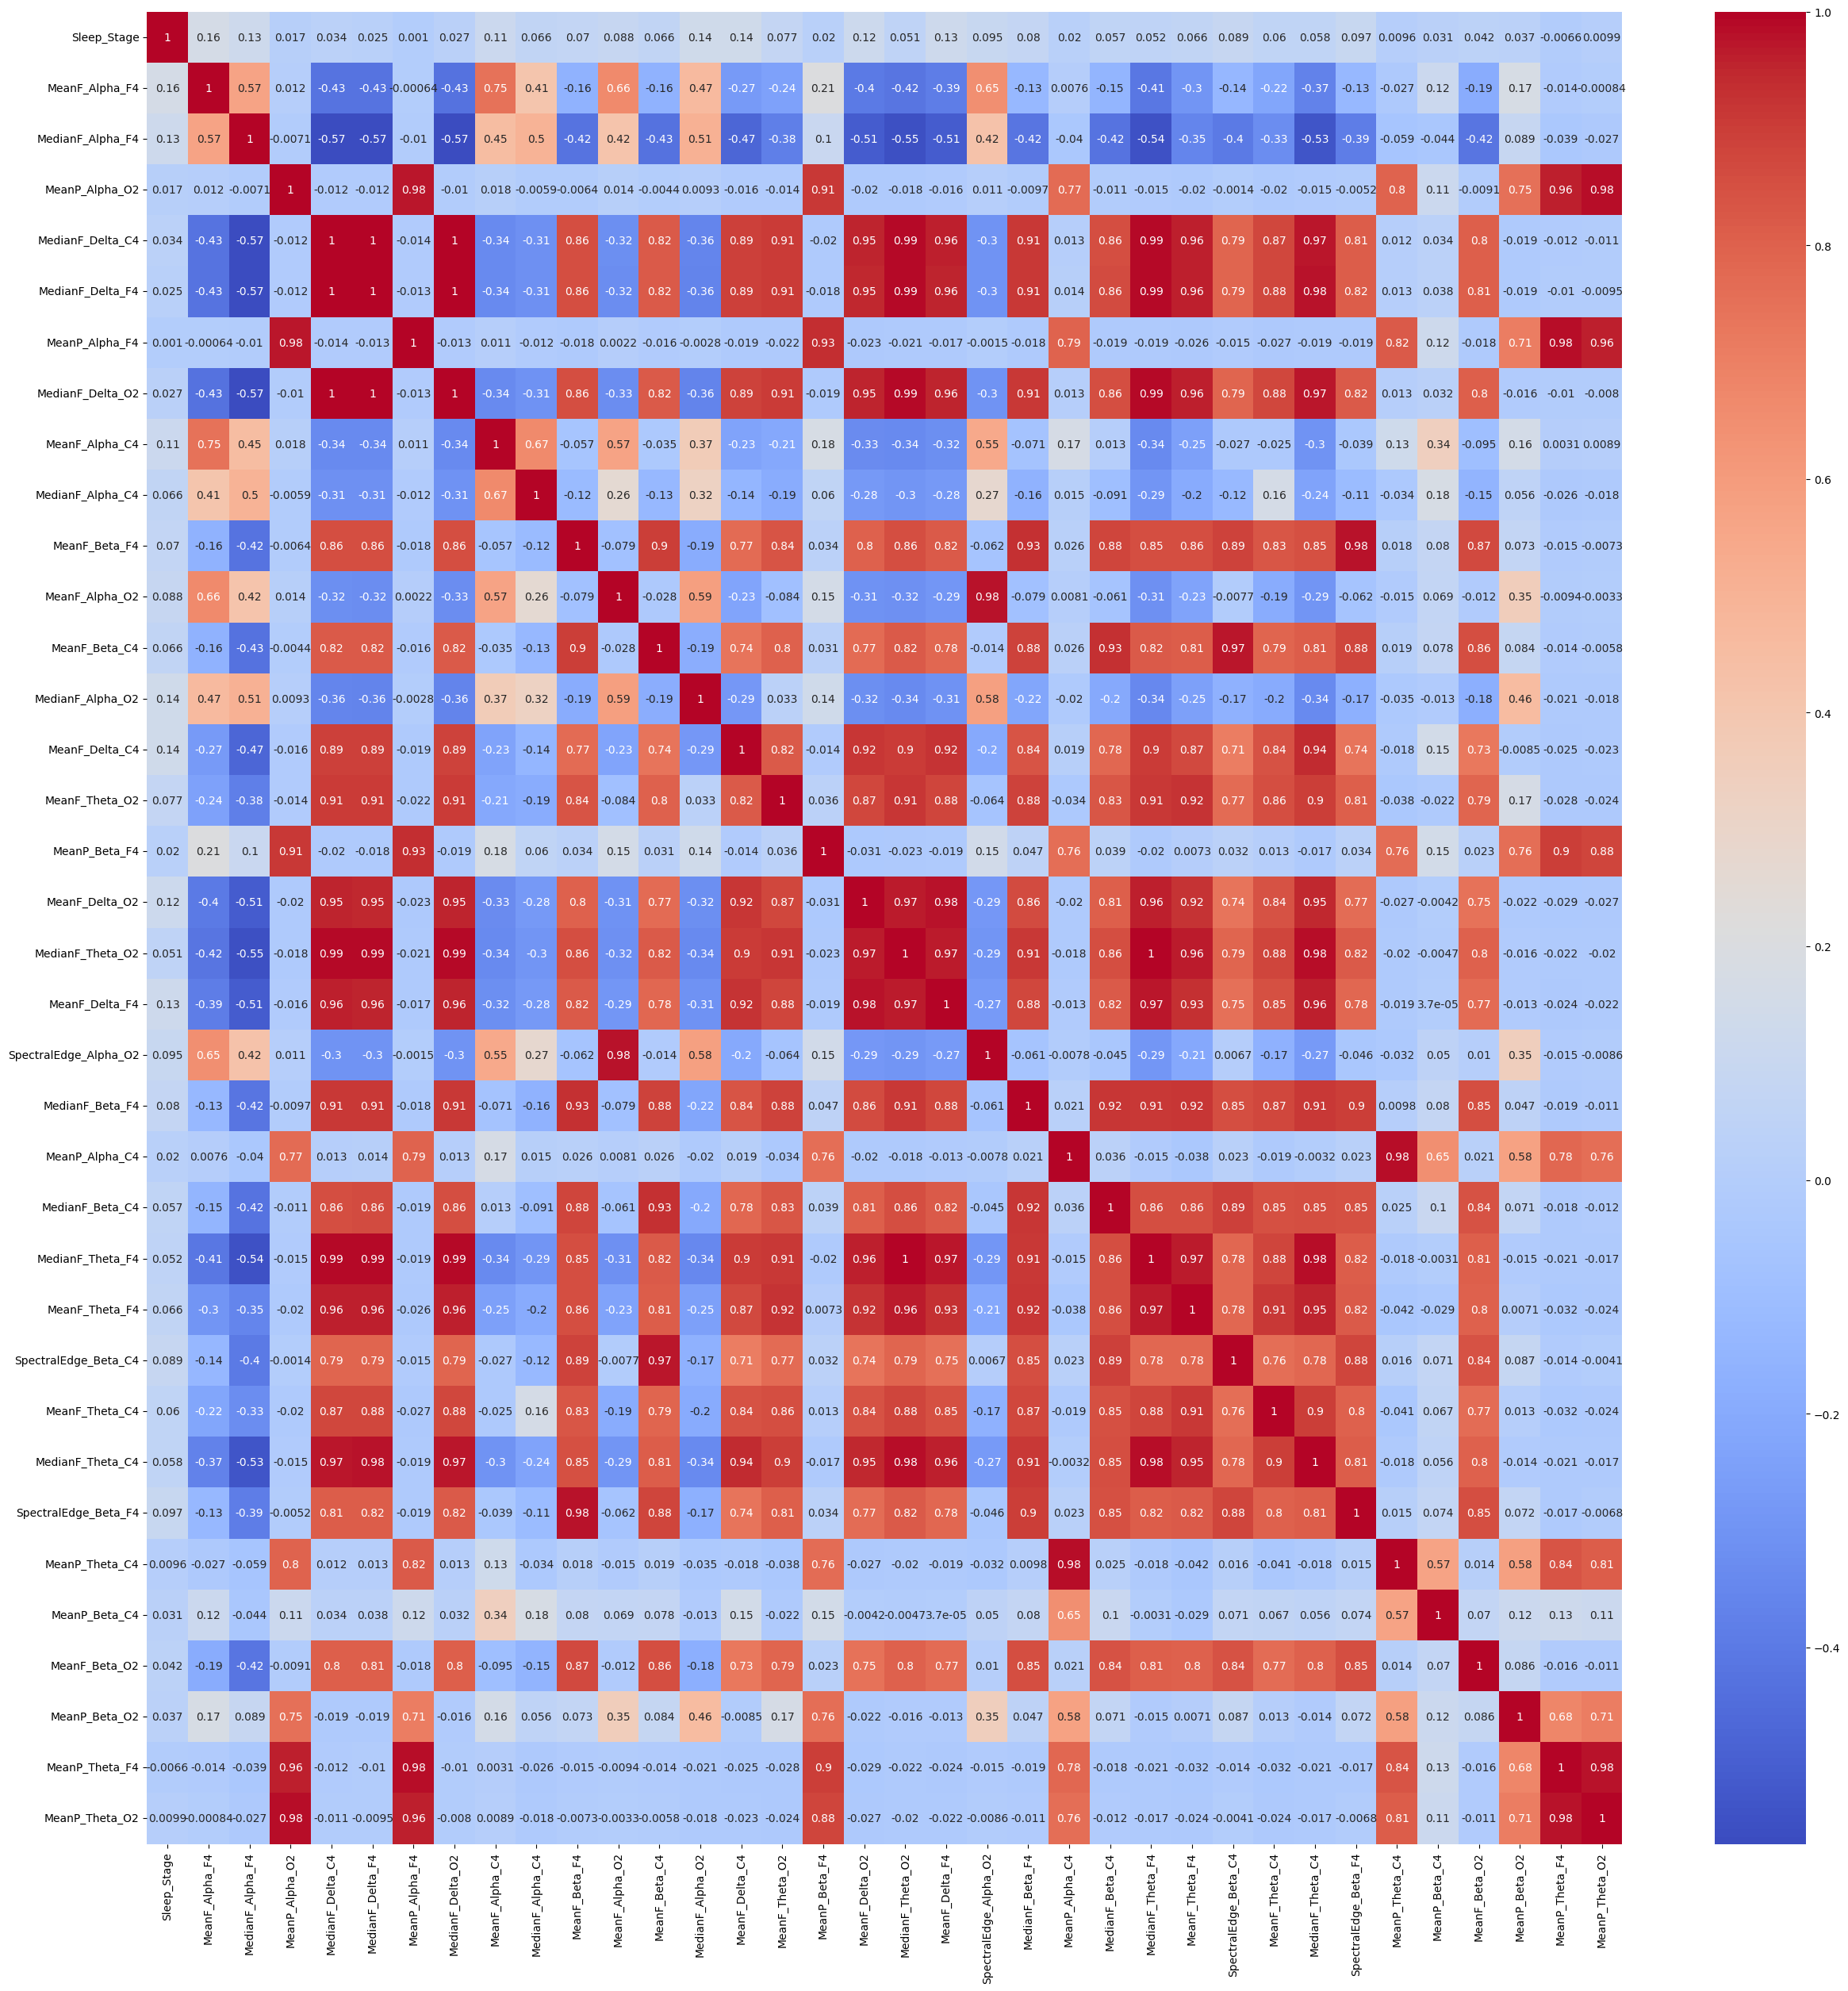

In [ ]:
correlation_Sleep_Stage = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_Sleep_Stage, annot=True, cmap="coolwarm")
plt.show()

#Histogram for Top 10 Features

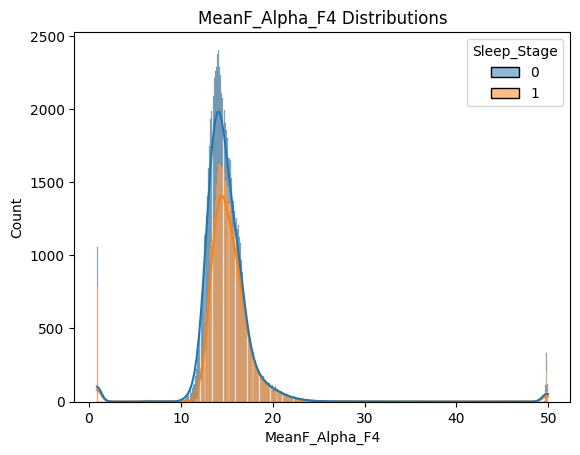

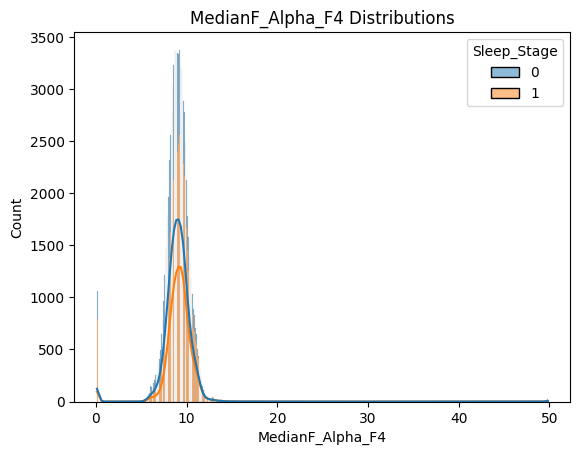

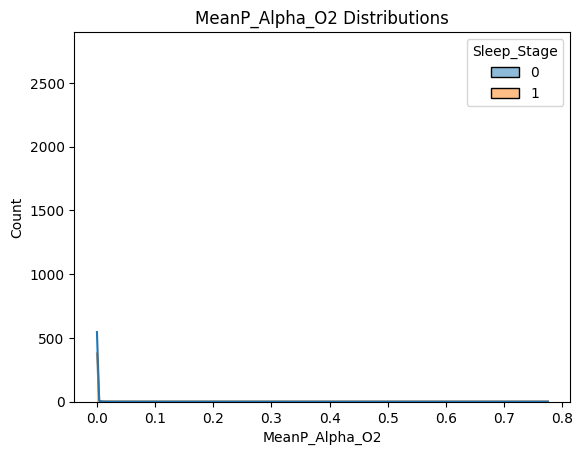

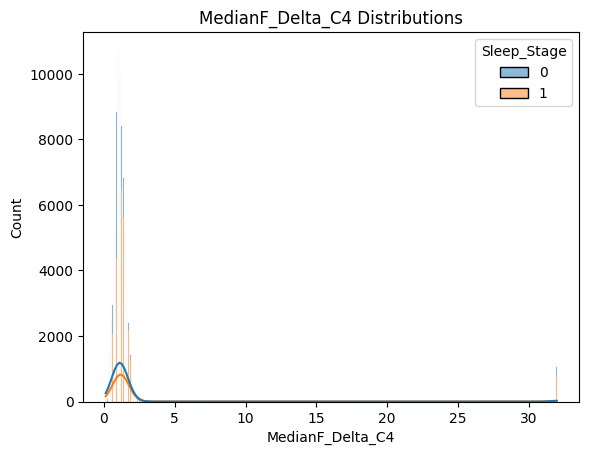

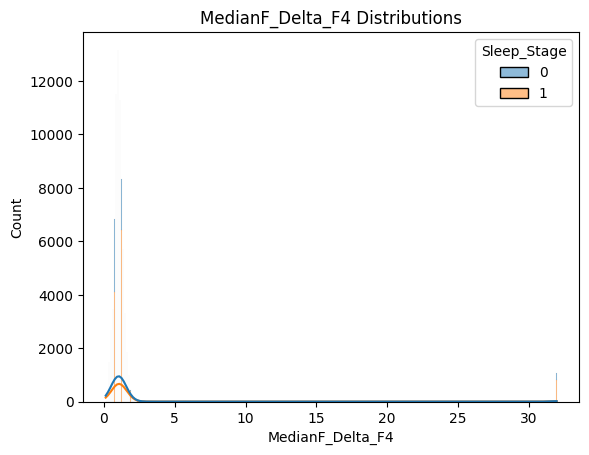

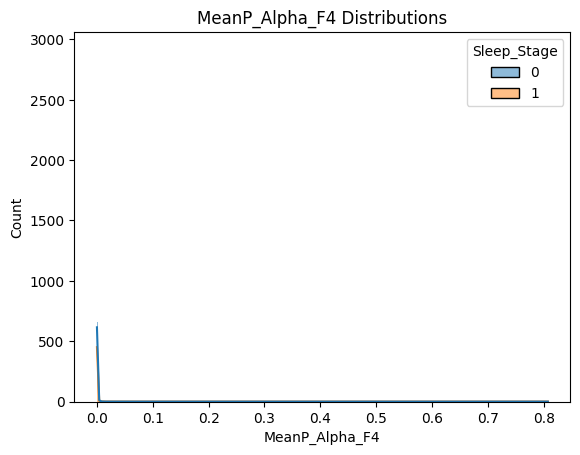

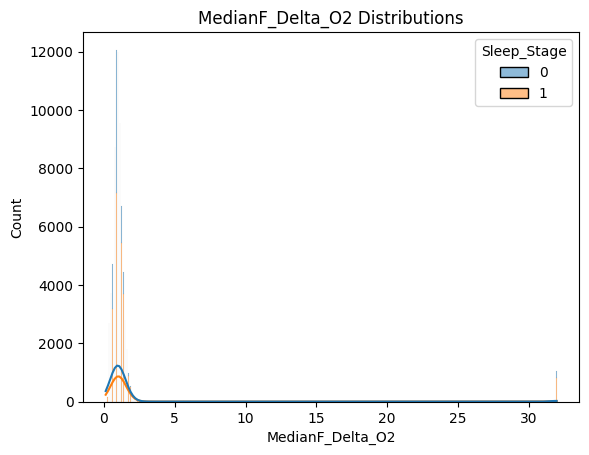

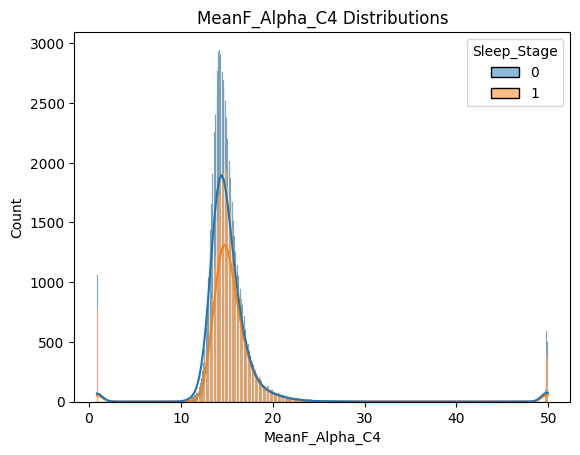

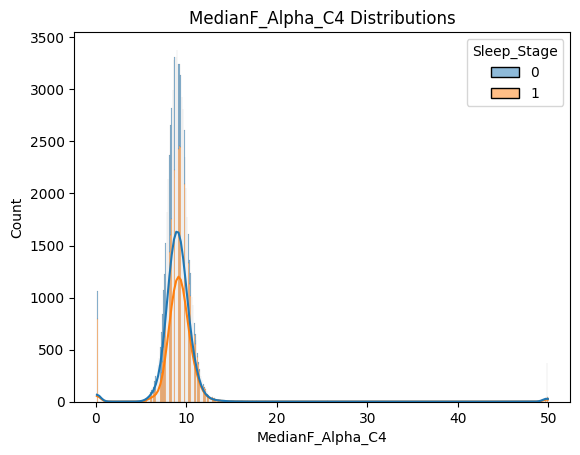

In [ ]:
numeric_col = PEARSON_feature[0:9]

for i in numeric_col[0:9]:
  plt.figure()
  sns.histplot(data=df,x=i, hue="Sleep_Stage",kde = True, multiple="stack")
  plt.title(i+" Distributions")
  plt.show()

#Spliting Dataset into X(features) and y(target)

In [24]:
X = df.loc[:,df.columns != target]
y = df[target]

#Scaling Dataset

In [25]:
X

,MeanF_Alpha_F4,MedianF_Alpha_F4,MeanP_Alpha_O2,MedianF_Delta_C4,MedianF_Delta_F4,MeanP_Alpha_F4,MedianF_Delta_O2,MeanF_Alpha_C4,MedianF_Alpha_C4,MeanF_Beta_F4,...,SpectralEdge_Beta_C4,MeanF_Theta_C4,MedianF_Theta_C4,SpectralEdge_Beta_F4,MeanP_Theta_C4,MeanP_Beta_C4,MeanF_Beta_O2,MeanP_Beta_O2,MeanP_Theta_F4,MeanP_Theta_O2
0,17.85756,10.11512,0.00023,0.87415,0.74927,0.00034,0.74927,18.48195,9.86537,25.35024,...,27.22341,12.11317,5.86927,27.47317,0.00048,0.00054,25.84976,0.00034,0.00041,0.00025
1,17.60780,10.73951,0.00023,0.87415,0.74927,0.00035,0.99902,19.60585,10.48976,25.22537,...,27.09854,12.98732,5.61951,26.97366,0.00051,0.00064,26.22439,0.00032,0.00040,0.00027
2,17.60780,9.36585,0.00025,1.62341,0.99902,0.00035,1.49854,17.35805,8.99122,26.09951,...,27.97268,10.61463,5.12000,28.47220,0.00078,0.00047,26.47415,0.00031,0.00052,0.00036
3,15.98439,9.74049,0.00029,0.87415,0.74927,0.00054,0.87415,17.10829,10.24000,21.72878,...,23.10244,12.98732,6.49366,22.47805,0.00059,0.00064,22.72780,0.00030,0.00058,0.00033
4,16.48390,10.11512,0.00020,0.74927,0.62439,0.00034,0.87415,17.10829,9.86537,22.10341,...,23.85171,12.36293,6.24390,23.47707,0.00042,0.00040,22.97756,0.00023,0.00044,0.00021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72626,15.23512,9.49073,0.00027,0.99902,0.99902,0.00027,0.99902,14.73561,9.61561,22.60293,...,22.60293,11.11415,4.24585,23.72683,0.00059,0.00022,22.60293,0.00021,0.00061,0.00061
72627,15.60976,9.61561,0.00024,0.99902,0.74927,0.00024,0.74927,15.23512,8.61659,22.85268,...,22.85268,10.48976,3.87122,23.85171,0.00068,0.00019,22.85268,0.00020,0.00056,0.00056
72628,15.36000,10.24000,0.00026,0.87415,0.74927,0.00026,0.74927,15.23512,10.24000,22.72780,...,22.97756,11.48878,4.62049,23.60195,0.00046,0.00021,22.72780,0.00022,0.00051,0.00051
72629,15.36000,8.61659,0.00026,0.99902,0.87415,0.00026,0.87415,15.36000,8.36683,22.97756,...,23.85171,10.86439,4.12098,24.10146,0.00058,0.00018,22.97756,0.00020,0.00056,0.00056


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X[X.columns] =   scaler.transform(X)

<ipython-input-26-c7f6b0716cdf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns] =   scaler.transform(X)


In [27]:
X

,MeanF_Alpha_F4,MedianF_Alpha_F4,MeanP_Alpha_O2,MedianF_Delta_C4,MedianF_Delta_F4,MeanP_Alpha_F4,MedianF_Delta_O2,MeanF_Alpha_C4,MedianF_Alpha_C4,MeanF_Beta_F4,...,SpectralEdge_Beta_C4,MeanF_Theta_C4,MedianF_Theta_C4,SpectralEdge_Beta_F4,MeanP_Theta_C4,MeanP_Beta_C4,MeanF_Beta_O2,MeanP_Beta_O2,MeanP_Theta_F4,MeanP_Theta_O2
0,0.735686,0.594647,-0.092332,-0.193415,-0.202155,-0.100254,-0.188472,0.611298,0.184280,-0.093541,...,-0.095448,-0.006670,-0.033532,-0.061905,-0.105332,-0.056032,-0.197575,-0.114450,-0.103471,-0.094887
1,0.673299,0.923647,-0.092332,-0.193415,-0.202155,-0.098638,-0.121487,0.833272,0.359354,-0.102278,...,-0.103624,0.115704,-0.068306,-0.095811,-0.103635,-0.054177,-0.172374,-0.117896,-0.104190,-0.093445
2,0.673299,0.199846,-0.089133,0.008245,-0.135040,-0.098638,0.012486,0.389324,-0.060823,-0.041116,...,-0.046389,-0.216452,-0.137854,0.005908,-0.088362,-0.057330,-0.155573,-0.119618,-0.095564,-0.086955
3,0.267796,0.397249,-0.082734,-0.193415,-0.202155,-0.067944,-0.154978,0.339996,0.289323,-0.346928,...,-0.365270,0.115704,0.053404,-0.400966,-0.099110,-0.054177,-0.407582,-0.121341,-0.091251,-0.089118
4,0.392566,0.594647,-0.097131,-0.227026,-0.235713,-0.100254,-0.154978,0.339996,0.184280,-0.320715,...,-0.316212,0.028295,0.018629,-0.333154,-0.108726,-0.058629,-0.390781,-0.133400,-0.101315,-0.097771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72626,0.080640,0.265647,-0.085933,-0.159807,-0.135040,-0.111562,-0.121487,-0.128617,0.114250,-0.285765,...,-0.397976,-0.146524,-0.259564,-0.316201,-0.099110,-0.061968,-0.415981,-0.136845,-0.089094,-0.068928
72627,0.174219,0.331448,-0.090732,-0.159807,-0.202155,-0.116409,-0.188472,-0.029962,-0.165866,-0.268290,...,-0.381624,-0.233933,-0.311725,-0.307724,-0.094018,-0.062524,-0.399181,-0.138568,-0.092689,-0.072533
72628,0.111833,0.660448,-0.087533,-0.193415,-0.202155,-0.113178,-0.188472,-0.029962,0.289323,-0.277028,...,-0.373447,-0.094079,-0.207402,-0.324677,-0.106463,-0.062153,-0.407582,-0.135122,-0.096283,-0.076139
72629,0.111833,-0.194949,-0.087533,-0.159807,-0.168596,-0.113178,-0.154978,-0.005297,-0.235897,-0.259553,...,-0.316212,-0.181488,-0.276950,-0.290771,-0.099675,-0.062710,-0.390781,-0.138568,-0.092689,-0.072533


#Spliting X and y to train and test sets

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val= train_test_split(X,y, test_size=0.3,random_state=42)

#we divided 70:30 = train:test_val. Now we have 70% data in our test set. Then we devided 30% into half. So we have 15% of total data in trest and validation.
X_test, X_val, y_test, y_val= train_test_split(X_test_val, y_test_val, train_size=.5, random_state=42)

In [29]:
X_train.shape[0],X_val.shape[0],X_test.shape[0]

(50841, 10895, 10895)

In [30]:
X_train

,MeanF_Alpha_F4,MedianF_Alpha_F4,MeanP_Alpha_O2,MedianF_Delta_C4,MedianF_Delta_F4,MeanP_Alpha_F4,MedianF_Delta_O2,MeanF_Alpha_C4,MedianF_Alpha_C4,MeanF_Beta_F4,...,SpectralEdge_Beta_C4,MeanF_Theta_C4,MedianF_Theta_C4,SpectralEdge_Beta_F4,MeanP_Theta_C4,MeanP_Beta_C4,MeanF_Beta_O2,MeanP_Beta_O2,MeanP_Theta_F4,MeanP_Theta_O2
27540,-3.506514,-4.669346,-0.129127,8.175585,8.187371,-0.155181,8.184753,-2.866300,-2.546865,7.079937,...,6.494780,7.248294,8.051445,6.753226,-0.132485,-0.066049,6.665438,-0.173021,-0.132944,-0.112914
68165,-0.262480,-0.392352,-0.044339,-0.227026,-0.202155,0.061295,-0.188472,-0.177945,-0.165866,0.098684,...,0.362435,-0.268897,-0.276950,1.446917,0.063240,-0.046757,1.415275,-0.083442,0.084149,-0.015567
52225,-0.387250,-0.260750,-0.033141,-0.193415,-0.135040,-0.051789,-0.121487,-0.325926,-0.200881,-0.390615,...,-0.545153,-0.233933,-0.190015,-0.485731,-0.046501,-0.058258,0.323242,-0.104114,-0.019366,-0.016289
71448,-0.480827,-0.326551,-0.074735,-0.193415,-0.168596,-0.082483,-0.221965,-0.276600,-0.410970,-0.477990,...,-0.610564,-0.303861,-0.329112,-0.578973,-0.057815,-0.061968,-0.399181,-0.145458,-0.038775,-0.035037
62702,-0.418443,-1.050351,-0.065136,-0.227026,-0.168596,-0.076021,-0.154978,-0.128617,-0.340939,-0.364403,...,-0.626917,-0.303861,-0.294337,-0.468779,-0.049330,-0.060298,1.415275,-0.129954,-0.018647,-0.028547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,-0.200094,-0.458153,-0.055537,-0.126196,-0.135040,-0.006555,-0.087994,-0.177945,-0.375955,-0.504202,...,-0.569682,-0.233933,-0.172629,-0.578973,-0.006338,-0.053064,-0.474784,-0.117896,-0.006427,-0.051622
6265,0.610916,-0.194949,-0.007544,-0.327859,-0.302831,-0.037250,-0.288952,0.463315,-0.200881,0.177321,...,0.158023,-0.146524,-0.311725,0.226297,-0.029531,-0.050467,0.071233,-0.002477,-0.011459,0.023371
54886,-0.012937,-0.392352,-0.060337,-0.126196,-0.101482,-0.058251,-0.154978,0.019367,-0.340939,-0.294503,...,-0.324388,-0.233933,-0.276950,-0.350107,-0.065735,-0.059927,-0.365580,-0.133400,-0.025117,-0.027826
860,0.579722,0.134051,-0.052338,-0.092585,-0.202155,-0.118024,-0.054500,0.685291,-0.025808,0.098684,...,1.392668,-0.094079,-0.137854,1.455394,-0.099110,-0.052693,-0.432782,-0.111005,-0.105628,-0.048737


#Oversampling using SMOTE
SNB: We used SMOTE in train data only, so that our test data can remain corrupted data free. The accurecy of the model will be counted only for actual data.

In [31]:
!pip install imbalanced-learn

<Axes: xlabel='Sleep_Stage', ylabel='count'>

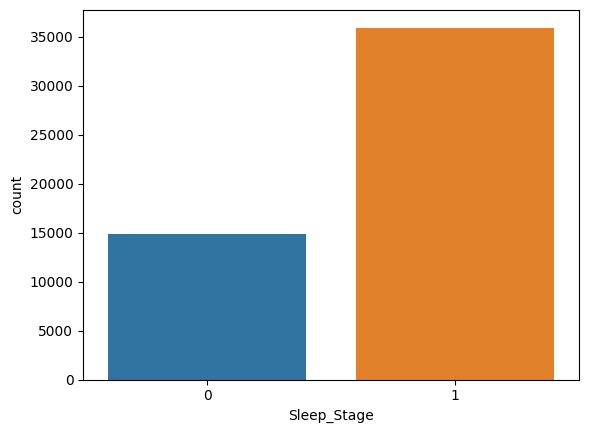

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train)

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)

<Axes: xlabel='Sleep_Stage', ylabel='count'>

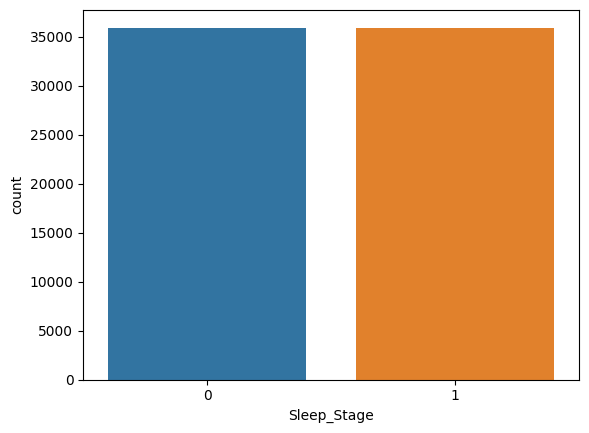

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train)

#Model Selection & Training

#ADABOOST

##For Deafult Hyparameters

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier()
ada_defult.fit(X_train, y_train)
y_pred_val = ada_defult.predict(X_val)


print("Accurecy: ",accuracy_score(y_val, y_pred_val))

Accurecy:  0.8347865993575034


##Tunning n_estimators(done)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
score_list_train = []
for k in tqdm(k_range):
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  score_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu),">>>>>>Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,score_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

  0%|          | 0/50 [00:00<?, ?it/s]

1/250 round completed......................... Val Accuracy: 0.7146397430013768 >>>>>>Train Accuracy: 0.7447483375532122
6/250 round completed......................... Val Accuracy: 0.7715465810004589 >>>>>>Train Accuracy: 0.8008541776800868
11/250 round completed......................... Val Accuracy: 0.8022028453419 >>>>>>Train Accuracy: 0.8112183856876548
16/250 round completed......................... Val Accuracy: 0.8117485084901331 >>>>>>Train Accuracy: 0.8309729835007373
21/250 round completed......................... Val Accuracy: 0.8186324001835704 >>>>>>Train Accuracy: 0.8353551654099775
26/250 round completed......................... Val Accuracy: 0.8255162918770078 >>>>>>Train Accuracy: 0.8393756434155978
31/250 round completed......................... Val Accuracy: 0.8258834327673245 >>>>>>Train Accuracy: 0.8431178876492028
36/250 round completed......................... Val Accuracy: 0.8291877007801743 >>>>>>Train Accuracy: 0.8466931916195988
41/250 round completed.......

In [ ]:
ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

#Graddient Boosting

##Deafult Hyperparameters

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_default = GradientBoostingClassifier()
gradBoost_default.fit(X_train, y_train)
y_pred_val = gradBoost_default.predict(X_val)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val,y_pred_val))
print("Accurecy: ",accuracy_score(y_val, y_pred_val))

##Tunning n_estimators

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=450
k_range = range (370,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_val)
  val_accu =  accuracy_score(y_val,y_pred)
  scores[k] =val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed.........................Val Accurecy: "+str(val_accu)," >>>Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

##Tunning max_depth (done)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu =  accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed.........................Val Accuracy: "+str(val_accu)," Training Accuracy"+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

In [ ]:
gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

In [ ]:
gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

#XGB

##Deafult Hyperparameters

In [ ]:
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier()
xgb_deafult.fit(X_train.values,y_train.values)
y_pred_val = xgb_deafult.predict(X_val.values)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val,y_pred_val))
print("Accurecy: ",accuracy_score(y_val, y_pred_val))

##Tunning n_estimators (done)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)

  y_pred=xgb_classifier.predict(X_val.values)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=xgb_classifier.predict(X_train.values)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Val Accureay: "+str(val_accu)," >>>>>>Training Accuracy: "+str(train_accu))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

##Tunning max_depth(done)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)

  y_pred=xgb_classifier.predict(X_val.values)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=xgb_classifier.predict(X_train.values)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu)," >>>>>>> Train Accuracy: "+str(train_accu))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)
print("Accurecy: ",accuracy_score(y_test, y_pred))

In [ ]:
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train.values,y_train.values)
y_pred = xgb_estimator.predict(X_test.values)
print("Accurecy: ",accuracy_score(y_test, y_pred))

In [ ]:
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train.values,y_train.values)
y_pred = xgb_all.predict(X_test.values)

print("Accurecy: ",accuracy_score(y_test, y_pred))

#RandomForestClassifier

##Deafult Hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier()
rf_default.fit(X_train, y_train)
y_pred_val=rf_default.predict(X_val)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val,y_pred_val))
print("Accurecy: ",accuracy_score(y_val, y_pred_val))

##Tunning n_estimators (done)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=250
k_range = range (196,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

##Tunning max_depth(done)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

In [ ]:
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

In [ ]:
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.852960073428178


##Tuning n_neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=50
k_range = range (1,Neighbors+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  y_pred=knn.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=knn.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu)," >>>>>>> Train Accuracy: "+str(train_accu))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_neighbors')
plt.ylabel ('Testing Accuracy')



print("The n_neighbors:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accurecy: ",accuracy_score(y_test, y_pred))

#NB

In [ ]:

from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.31867829279486004


#HistogramBoosting